In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house = pd.read_csv('../housing.csv')
house

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X = house.drop('median_house_value', axis=1)
y = house['median_house_value']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=124)

In [6]:
X_train.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16563    -121.48     37.77                19.0       2364.0           373.0   
6996     -118.03     33.95                34.0       1882.0           428.0   
16525    -121.20     37.79                36.0        866.0           160.0   
16305    -121.35     38.01                15.0       2682.0           599.0   
11317    -117.97     33.77                22.0       2244.0           575.0   

       population  households  median_income ocean_proximity  
16563      1264.0       390.0         5.0176          INLAND  
6996       1034.0       375.0         3.6509       <1H OCEAN  
16525       502.0       149.0         2.4798          INLAND  
16305      1520.0       601.0         3.5982          INLAND  
11317      1543.0       533.0         2.6618       <1H OCEAN

In [7]:
y_train.head()

16563    274200.0
6996     173200.0
16525    101500.0
16305     94400.0
11317    179600.0
Name: median_house_value, dtype: float64

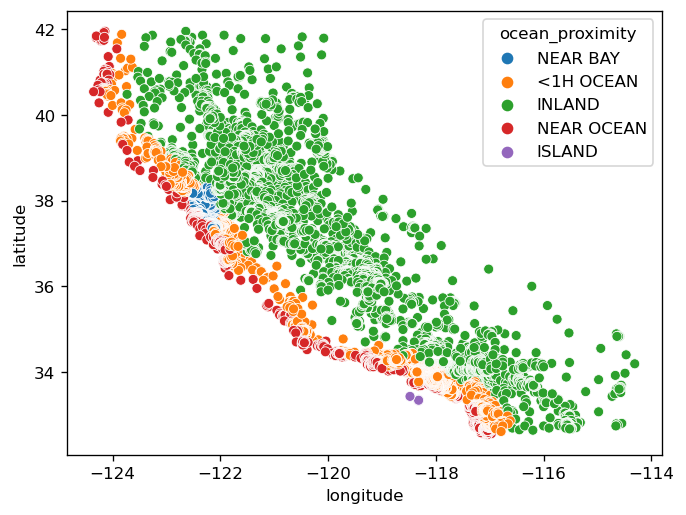

In [8]:
plt.figure(dpi=120)
sns.scatterplot(data=house, x='longitude', y='latitude', hue='ocean_proximity')
plt.show()

C:\Users\hello\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


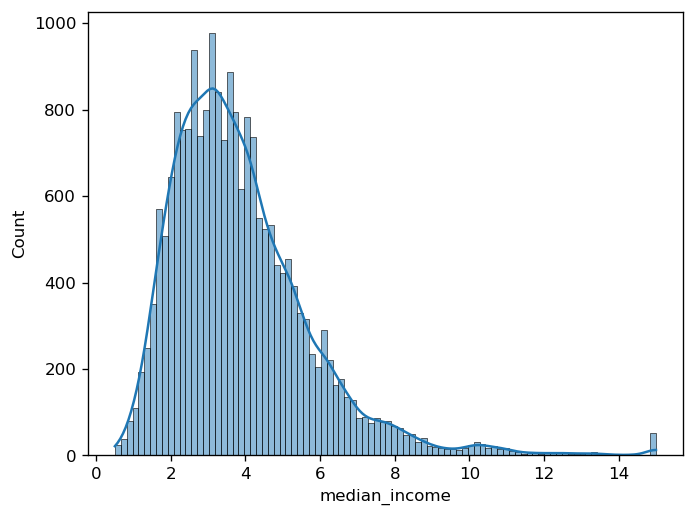

In [9]:
plt.figure(dpi=120)
sns.histplot(house['median_income'], kde=True)
plt.show()

In [10]:
(house['ocean_proximity'].value_counts() / house.shape[0] * 100).sort_values(ascending=False)

ocean_proximity
<1H OCEAN     44.263566
INLAND        31.739341
NEAR OCEAN    12.877907
NEAR BAY      11.094961
ISLAND         0.024225
Name: count, dtype: float64

In [11]:
(X_train['ocean_proximity'].value_counts() / X_train.shape[0] * 100).sort_values(ascending=False)

ocean_proximity
<1H OCEAN     44.149709
INLAND        31.734496
NEAR OCEAN    12.954215
NEAR BAY      11.131298
ISLAND         0.030281
Name: count, dtype: float64

In [12]:
(X_test['ocean_proximity'].value_counts() / X_test.shape[0] * 100).sort_values(ascending=False)


ocean_proximity
<1H OCEAN     44.718992
INLAND        31.758721
NEAR OCEAN    12.572674
NEAR BAY      10.949612
Name: count, dtype: float64

In [13]:
house.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

C:\Users\hello\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


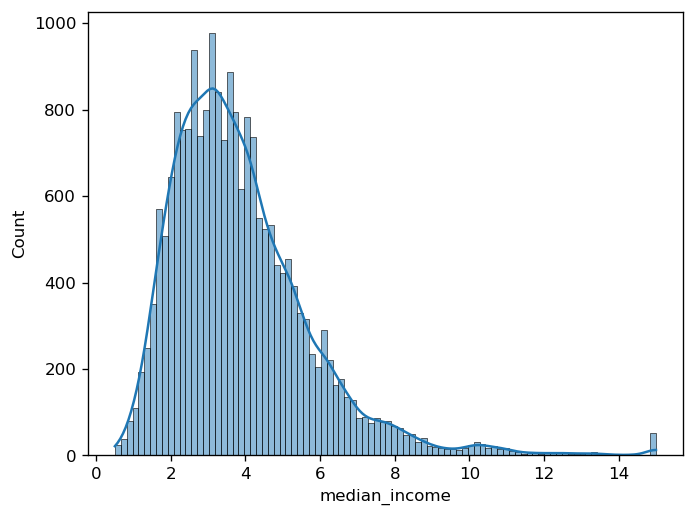

In [14]:
plt.figure(dpi=120)
sns.histplot(house['median_income'], kde=True)
plt.show()

In [15]:
pd.cut(house['median_income'], bins=[0,2,4,6,8,np.inf], labels=[1,2,3,4,5])

0        5
1        5
2        4
3        3
4        2
        ..
20635    1
20636    2
20637    1
20638    1
20639    2
Name: median_income, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [16]:
pd.cut(house['median_income'], bins=[0,2,4,6,8,np.inf], labels=[1,2,3,4,5]).value_counts()


median_income
2    10096
3     5725
1     2457
4     1672
5      690
Name: count, dtype: int64

<Axes: xlabel='median_income'>

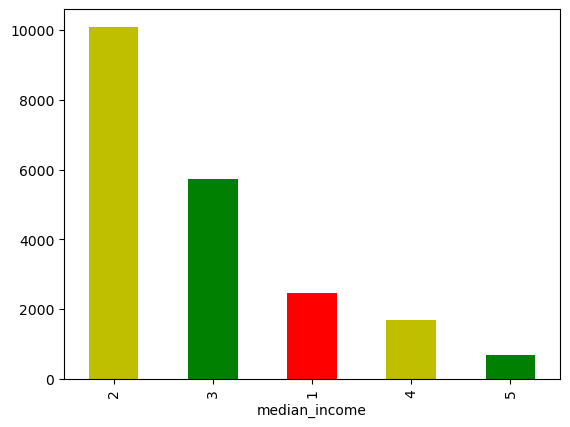

In [17]:
pd.cut(house['median_income'], bins=[0,2,4,6,8,np.inf], labels=[1,2,3,4,5]).value_counts().plot(kind='bar', color=list('ygr'))


In [18]:
house

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [19]:
X_train.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16563    -121.48     37.77                19.0       2364.0           373.0   
6996     -118.03     33.95                34.0       1882.0           428.0   
16525    -121.20     37.79                36.0        866.0           160.0   
16305    -121.35     38.01                15.0       2682.0           599.0   
11317    -117.97     33.77                22.0       2244.0           575.0   

       population  households  median_income ocean_proximity  
16563      1264.0       390.0         5.0176          INLAND  
6996       1034.0       375.0         3.6509       <1H OCEAN  
16525       502.0       149.0         2.4798          INLAND  
16305      1520.0       601.0         3.5982          INLAND  
11317      1543.0       533.0         2.6618       <1H OCEAN

In [20]:
X_test.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2983     -119.03     35.34                34.0       2221.0           436.0   
17551    -121.86     37.34                29.0       5274.0          1625.0   
6341     -117.90     33.97                23.0       7353.0          1255.0   
9001     -118.34     33.99                47.0       1107.0           199.0   
10243    -117.86     33.91                16.0       2889.0           423.0   

       population  households  median_income ocean_proximity  
2983       1131.0       408.0         3.0486          INLAND  
17551      6234.0      1639.0         2.5947       <1H OCEAN  
6341       4014.0      1124.0         5.4155       <1H OCEAN  
9001        437.0       178.0         3.7344       <1H OCEAN  
10243      1227.0       401.0         6.4514       <1H OCEAN

In [22]:
def get_ratio(df, col):
    ratio = (df[col].value_counts() / df.shape[0])*100
    return ratio

In [24]:
get_ratio(house, 'ocean_proximity')

ocean_proximity
<1H OCEAN     44.263566
INLAND        31.739341
NEAR OCEAN    12.877907
NEAR BAY      11.094961
ISLAND         0.024225
Name: count, dtype: float64

In [23]:
get_ratio(X_train, 'ocean_proximity')

ocean_proximity
<1H OCEAN     44.149709
INLAND        31.734496
NEAR OCEAN    12.954215
NEAR BAY      11.131298
ISLAND         0.030281
Name: count, dtype: float64

In [25]:
get_ratio(X_test, 'ocean_proximity')

ocean_proximity
<1H OCEAN     44.718992
INLAND        31.758721
NEAR OCEAN    12.572674
NEAR BAY      10.949612
Name: count, dtype: float64

C:\Users\hello\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


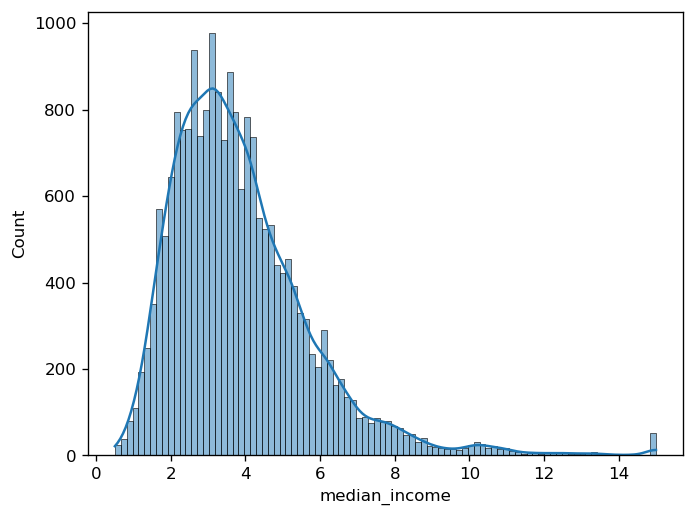

In [27]:
plt.figure(dpi=120)
sns.histplot(data=house, x='median_income', kde=True)
plt.show()

In [29]:
house.head(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
5       413.0       193.0         4.0368            269700.0        NEAR BAY  
6      1094.0       514.0         3.6591            299200.0        NEAR BAY  
7      1157.0       647.0         3.1200            241400.0        NEAR BAY  
8      1206.0       595.0         2.0804            226700.0        NEAR BAY  
9      1551.0       714.0         3.6912            261100.0        NEAR BAY

In [ ]:
X_train

In [30]:
house['income_cat'] = pd.cut(house['median_income'], bins=[0, 2, 4, 6, 8, np.inf], labels=['very low', 'low', 'medium', 'high', 'very high'])
X_train['income_cat'] = pd.cut(X_train['median_income'], bins=[0, 2, 4, 6, 8, np.inf], labels=['very low', 'low', 'medium', 'high', 'very high'])
X_test['income_cat'] = pd.cut(X_test['median_income'], bins=[0, 2, 4, 6, 8, np.inf], labels=['very low', 'low', 'medium', 'high', 'very high'])


In [31]:
house

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity income_cat  
0            NEAR BAY  very high  
1            NEAR BAY  very high  
2            NEAR BAY       high  
3            NEAR BAY     medium  
4            NEAR BAY        low  
...               ...        ...  
20635          INLAND   very low  
20636          INLAND        low  
20637          INLAND   very low  
20638          INLAND   very low  
20639          INLAND        low  

[20640 rows x 11 columns]

In [32]:
X_train

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16563    -121.48     37.77                19.0       2364.0           373.0   
6996     -118.03     33.95                34.0       1882.0           428.0   
16525    -121.20     37.79                36.0        866.0           160.0   
16305    -121.35     38.01                15.0       2682.0           599.0   
11317    -117.97     33.77                22.0       2244.0           575.0   
...          ...       ...                 ...          ...             ...   
681      -122.15     37.69                39.0       1670.0           308.0   
9154     -118.52     34.46                 5.0      15341.0          2527.0   
14353    -117.22     32.75                26.0        696.0           185.0   
4764     -118.36     34.04                45.0       1767.0           417.0   
4558     -118.25     34.06                12.0       4011.0          1438.0   

       population  households  median_income ocean_proximity income_cat  
16563      1264.0       390.0         5.0176          INLAND     medium  
6996       1034.0       375.0         3.6509       <1H OCEAN        low  
16525       502.0       149.0         2.4798          INLAND        low  
16305      1520.0       601.0         3.5982          INLAND        low  
11317      1543.0       533.0         2.6618       <1H OCEAN        low  
...           ...         ...            ...             ...        ...  
681         957.0       335.0         5.1312        NEAR BAY     medium  
9154       7270.0      2320.0         6.1281       <1H OCEAN       high  
14353       384.0       184.0         2.6121      NEAR OCEAN        low  
4764       1052.0       379.0         3.5161       <1H OCEAN        low  
4558       1673.0      1088.0         5.3081       <1H OCEAN     medium  

[16512 rows x 10 columns]

In [33]:
X_test

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2983     -119.03     35.34                34.0       2221.0           436.0   
17551    -121.86     37.34                29.0       5274.0          1625.0   
6341     -117.90     33.97                23.0       7353.0          1255.0   
9001     -118.34     33.99                47.0       1107.0           199.0   
10243    -117.86     33.91                16.0       2889.0           423.0   
...          ...       ...                 ...          ...             ...   
8677     -118.32     33.88                34.0       1803.0           341.0   
16536    -121.24     37.79                 7.0       5151.0           867.0   
17460    -119.85     34.40                14.0       2307.0           650.0   
7375     -118.22     33.97                47.0       1058.0           295.0   
12394    -116.37     33.69                 7.0       8806.0          1542.0   

       population  households  median_income ocean_proximity income_cat  
2983       1131.0       408.0         3.0486          INLAND        low  
17551      6234.0      1639.0         2.5947       <1H OCEAN        low  
6341       4014.0      1124.0         5.4155       <1H OCEAN     medium  
9001        437.0       178.0         3.7344       <1H OCEAN        low  
10243      1227.0       401.0         6.4514       <1H OCEAN       high  
...           ...         ...            ...             ...        ...  
8677        947.0       333.0         5.5538       <1H OCEAN     medium  
16536      2553.0       805.0         4.0750          INLAND     medium  
17460      5723.0       615.0         2.1652      NEAR OCEAN        low  
7375       1097.0       274.0         2.8810       <1H OCEAN        low  
12394       858.0       448.0         7.8005          INLAND       high  

[4128 rows x 10 columns]

In [34]:
get_ratio(house, 'income_cat')

income_cat
low          48.914729
medium       27.737403
very low     11.904070
high          8.100775
very high     3.343023
Name: count, dtype: float64

In [35]:
get_ratio(X_train, 'income_cat')

income_cat
low          49.218750
medium       27.458818
very low     11.979167
high          7.969961
very high     3.373304
Name: count, dtype: float64

In [36]:
get_ratio(X_test, 'income_cat')

income_cat
low          47.698643
medium       28.851744
very low     11.603682
high          8.624031
very high     3.221899
Name: count, dtype: float64

In [37]:
from sklearn.model_selection import StratifiedShuffleSplit

In [42]:
X = house.drop(['median_house_value'], axis=1)
y = house.median_house_value

In [39]:
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=123)
split

StratifiedShuffleSplit(n_splits=5, random_state=123, test_size=0.2,
            train_size=None)

In [40]:
print(dir(split))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_default_test_size', '_iter_indices', 'get_n_splits', 'n_splits', 'random_state', 'split', 'test_size', 'train_size']


In [46]:
c = 1
for i in split.split(X, X['ocean_proximity']):
    print(f"Split-{c}: {i}")
    print()
    c += 1

Split-1: (array([ 5015,  3769,  4895, ...,  5040, 15540, 16420], dtype=int64), array([15606,  1721, 10372, ..., 17953,  4683, 20144], dtype=int64))

Split-2: (array([ 3239,  6480,  1242, ...,  5607,  6186, 15453], dtype=int64), array([20638, 19583, 15351, ..., 10120, 17973,  8380], dtype=int64))

Split-3: (array([17201,  9158, 18204, ..., 16694,  4065,  7006], dtype=int64), array([12059,   452, 12482, ...,  3445, 20047, 10784], dtype=int64))

Split-4: (array([12213, 15033, 13893, ...,  3346,  9067,  9779], dtype=int64), array([18842, 20635,   232, ...,  6419, 20335, 19781], dtype=int64))

Split-5: (array([20012, 19870,  8754, ...,  4096,  1904, 13255], dtype=int64), array([ 7009,  5307, 15015, ...,  7692,  8119,  7242], dtype=int64))



In [47]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
split

StratifiedShuffleSplit(n_splits=1, random_state=123, test_size=0.2,
            train_size=None)

In [49]:
for i in split.split(X, X['ocean_proximity']):
    print(i)

(array([ 5015,  3769,  4895, ...,  5040, 15540, 16420], dtype=int64), array([15606,  1721, 10372, ..., 17953,  4683, 20144], dtype=int64))


In [50]:
for train_idx, test_idx in split.split(X, X['ocean_proximity']):
    print(train_idx)
    print()
    print(test_idx)

[ 5015  3769  4895 ...  5040 15540 16420]

[15606  1721 10372 ... 17953  4683 20144]


In [52]:
split.split(X, X['ocean_proximity'])

<generator object BaseShuffleSplit.split at 0x00000296CEC3CE40>

In [51]:
train_idx, test_idx = split.split(X, X['ocean_proximity'])

ValueError: not enough values to unpack (expected 2, got 1)

In [53]:
(train_idx, test_idx), = split.split(X, X['ocean_proximity'])

In [54]:
train_idx

array([ 5015,  3769,  4895, ...,  5040, 15540, 16420], dtype=int64)

In [55]:
test_idx

array([15606,  1721, 10372, ..., 17953,  4683, 20144], dtype=int64)

In [56]:
X_train = X.iloc[train_idx]
X_test = X.iloc[test_idx]
y_train = y.iloc[train_idx]
y_test = y.iloc[test_idx]

In [57]:
X_train.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5015     -118.32     34.00                50.0       2189.0           460.0   
3769     -118.43     34.16                34.0       2459.0           489.0   
4895     -118.24     34.01                48.0        396.0            99.0   
7963     -118.19     33.86                42.0       1999.0           431.0   
19675    -121.62     39.16                 7.0       4480.0           776.0   

       population  households  median_income ocean_proximity income_cat  
5015       1097.0       469.0         2.4583       <1H OCEAN        low  
3769       1139.0       463.0         4.0347       <1H OCEAN     medium  
4895        485.0       110.0         2.3750       <1H OCEAN        low  
7963       1060.0       399.0         3.7031       <1H OCEAN        low  
19675      2271.0       767.0         3.8090          INLAND        low

In [58]:
X_test.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
15606    -116.62     32.86                18.0       4115.0           847.0   
1721     -122.39     38.00                33.0         44.0             6.0   
10372    -117.65     33.63                16.0       3388.0           425.0   
2949     -119.00     35.35                31.0       2931.0           716.0   
11342    -117.93     33.76                17.0       3341.0           803.0   

       population  households  median_income ocean_proximity income_cat  
15606      2032.0       745.0         4.0159       <1H OCEAN     medium  
1721         23.0        11.0         4.1250        NEAR BAY     medium  
10372      1395.0       427.0         8.4471       <1H OCEAN  very high  
2949       1969.0       588.0         2.2155          INLAND        low  
11342      3381.0       825.0         3.3710       <1H OCEAN        low

In [59]:
get_ratio(X, 'ocean_proximity')

ocean_proximity
<1H OCEAN     44.263566
INLAND        31.739341
NEAR OCEAN    12.877907
NEAR BAY      11.094961
ISLAND         0.024225
Name: count, dtype: float64

In [60]:
get_ratio(X_train, 'ocean_proximity')


ocean_proximity
<1H OCEAN     44.264777
INLAND        31.740552
NEAR OCEAN    12.875484
NEAR BAY      11.094961
ISLAND         0.024225
Name: count, dtype: float64

In [61]:
get_ratio(X_test, 'ocean_proximity')


ocean_proximity
<1H OCEAN     44.258721
INLAND        31.734496
NEAR OCEAN    12.887597
NEAR BAY      11.094961
ISLAND         0.024225
Name: count, dtype: float64

In [ ]:
def stratified_sampling()

In [63]:
X_train.to_numpy()

array([[-118.32, 34.0, 50.0, ..., 2.4583, '<1H OCEAN', 'low'],
       [-118.43, 34.16, 34.0, ..., 4.0347, '<1H OCEAN', 'medium'],
       [-118.24, 34.01, 48.0, ..., 2.375, '<1H OCEAN', 'low'],
       ...,
       [-118.32, 33.98, 44.0, ..., 2.2396, '<1H OCEAN', 'low'],
       [-117.14, 33.07, 12.0, ..., 4.3513, '<1H OCEAN', 'medium'],
       [-121.29, 37.89, 26.0, ..., 5.7485, 'INLAND', 'medium']],
      dtype=object)